In [1]:
# https://hub.arcgis.com/pages/a0db1c6905934fb5a522137f0fec6c7b
# https://spatialvision.com.au/blog-open-source-spatial-geopandas-part-1/

import matplotlib.pyplot as plt

import geopandas as gpd
# folium pesquisar

# Extração de shapes e Plots

- Extração de região geográfica de interesse (bbbike) no formato .shp
- Plot de shapes

shape: (1015, 8)


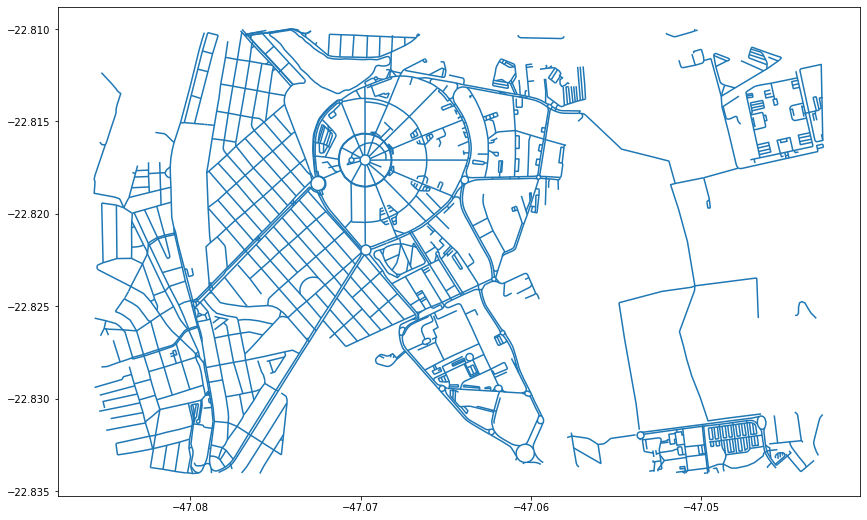

In [2]:
# bbbike: https://extract.bbbike.org/
# use bbbike to obtain shape files

# Unicamp Shapes:
# landuse
# natural
# places
# points
# railways
# roads
# waterways
# buildings

unicamp_df_roads = gpd.read_file('unicamp/shape/roads.shp')
print('shape:', unicamp_df_roads.shape)
ax = unicamp_df_roads.plot(figsize=(17, 9))

In [3]:
unicamp_df = gpd.read_file('unicamp/shape/buildings.shp')

print('shape:', unicamp_df.shape)
unicamp_df.head()

shape: (509, 4)


,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [4]:
print(unicamp_df.geometry.iloc[0])

POLYGON ((-47.063773 -22.8136798, -47.0637523 -22.8136705, -47.0636838 -22.8138006, -47.0640575 -22.8139678, -47.0641095 -22.8138691, -47.0640289 -22.813833, -47.0641053 -22.8136878, -47.0639184 -22.8136043, -47.0638586 -22.8137178, -47.0638184 -22.8136998, -47.063773 -22.8136798))


In [5]:
# crs - sistema de coordenadas
unicamp_df.crs

# WGS 84 - sistema de coords mundial (degree)

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

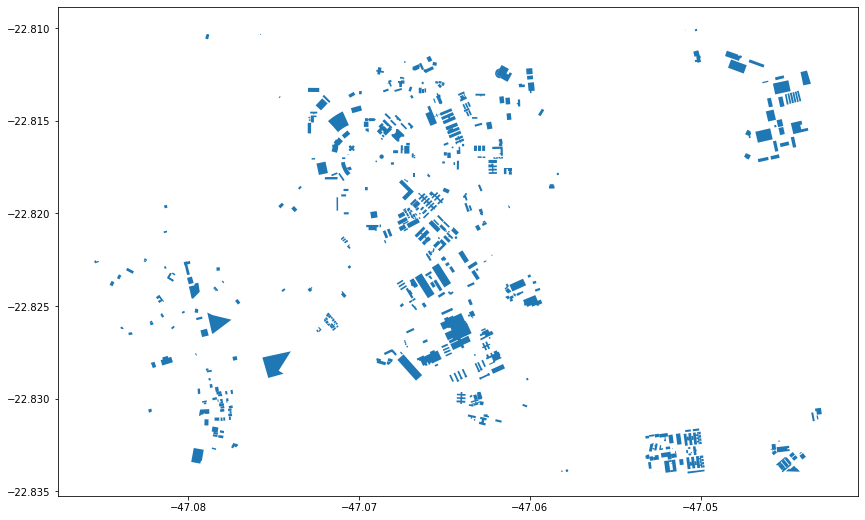

In [6]:
ax = unicamp_df.plot(figsize=(17, 9))

,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."


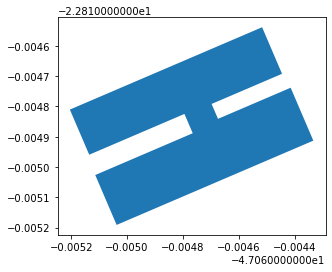

In [7]:
ic_predio = unicamp_df.query('osm_id == 95011169')
ax = ic_predio.plot()
ic_predio.head()

# SIRGAS 2000 / UTM zone 23S 

Conversão de CRS WGS 84 para SIRGAS 2000, que é dado em metros e representa o sistemas de georeferência das Américas.

Características:

- Datum: SIRGAS 2000
- Projeção: UTM zone 23S (Campinas/SP)
- América Latina
- Hemisfério sul. 

Referências:
- https://epsg.io/31981
- https://spatialreference.org/ref/?search=31981
- https://pt.slideshare.net/JorgeSantos30/20141011-qgis24-sistemadereferenciadecoordenadas
- https://ocefpaf.github.io/python4oceanographers/blog/2013/12/16/utm/
- https://cursos.alura.com.br/forum/topico-erro-ao-reprojetar-usando-a-funcao-to_crs-77139


In [8]:
unicamp_dff = gpd.read_file('unicamp/shape/buildings.shp')
unicamp_df.head()

,osm_id,name,type,geometry
0,95011154,IC 3,university,"POLYGON ((-47.06377 -22.81368, -47.06375 -22.8..."
1,95011157,Banco Santander,bank,"POLYGON ((-47.06880 -22.81689, -47.06881 -22.8..."
2,95011161,Ciclo Básico II,university,"POLYGON ((-47.07069 -22.81797, -47.07050 -22.8..."
3,95011169,IC - Instituto de Computação,university,"POLYGON ((-47.06520 -22.81481, -47.06452 -22.8..."
4,95011172,IC 3.5,university,"POLYGON ((-47.06422 -22.81356, -47.06417 -22.8..."


In [9]:

# unicamp_utm_df = unicamp_dff.to_crs('+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84  +units=km +no_defs')  

# SIRGAS 2000 / UTM one 23S : 31983 # região da cidade de São Paulo
unicamp_utm_df = unicamp_dff.to_crs(31981)
unicamp_utm_df.crs

<Projected CRS: EPSG:31981>
Name: SIRGAS 2000 / UTM zone 21S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: South America - 60°W to 54°W, S hemisphere and SIRGAS 2000 by country
- bounds: (-60.0, -44.82, -54.0, 4.51)
Coordinate Operation:
- name: UTM zone 21S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

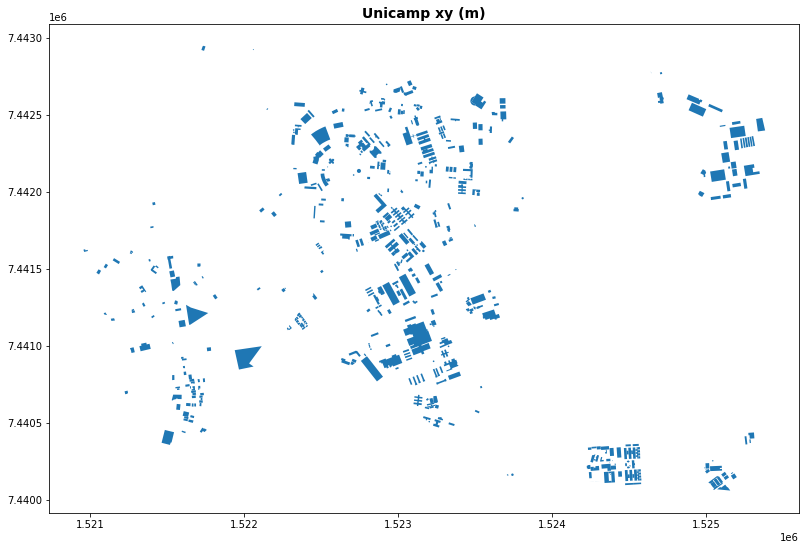

In [10]:
ax = unicamp_utm_df.plot(figsize=(17, 9))
#ax = unicamp_utm_df.plot()
unicamp_utm_df.head()

ttl = ax.title
# ttl.set_position([.5, 1.04])
plt.title('Unicamp xy (m)',fontweight='bold',fontsize=14)
plt.savefig('unicamp_predios.png', bbox_inches='tight')

In [11]:
print(ax.axis)
print(ax.axes)
print(ax.autoscale)

<bound method _AxesBase.axis of <AxesSubplot:title={'center':'Unicamp xy (m)'}>>
AxesSubplot(0.206169,0.125;0.612662x0.755)
<bound method _AxesBase.autoscale of <AxesSubplot:title={'center':'Unicamp xy (m)'}>>


In [12]:
# Get plot [bottom, top] & [left, right] (km)
print('y-axis range [bottom, top]:',ax.get_ylim())
print('x-axis range [left, right]:',ax.get_ylim())
# Get height and width (km)
height = (ax.get_ylim()[1] - ax.get_ylim()[0]) 
width = (ax.get_xlim()[1] - ax.get_xlim()[0]) 
print('\nY (m):', height, '\nX (m):', width, '\nArea (m2):', height * width )

# comparar area de estudo comparar com calculo feito em: 
# https://unicamp-arcgis.maps.arcgis.com/apps/View/index.html?appid=1d96ada62af4451bb4972b9779d09e66

y-axis range [bottom, top]: (7439914.781355322, 7443091.431733073)
x-axis range [left, right]: (7439914.781355322, 7443091.431733073)

Y (m): 3176.6503777503967 
X (m): 4869.111407272285 
Area (m2): 15467464.591220269


,osm_id,name,type,geometry
3,95011169,IC - Instituto de Computação,university,"POLYGON ((1523124.241 7442348.144, 1523197.724..."


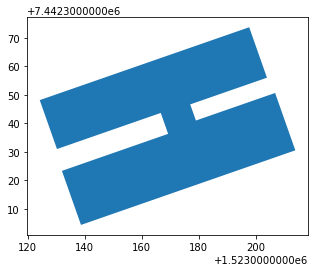

In [13]:
ic_predio = unicamp_utm_df.query('osm_id == 95011169')
ax = ic_predio.plot()

ic_predio.head()

# Normalização de dados

- Teste para normalizar polygono que representa predio do IC
- Normalizar escala de:

 minx          miny          maxx          maxy

[ 1.523123e+06  7.442303e+06  1.523215e+06  7.442375e+06]

para:

[ 0.          0.         89.66854577 69.34931372]




Rescale polygon:

 POLYGON ((0 43.78183907642961, 73.48268995573744 69.34931372478604, 79.71968141733669 51.65114116296172, 52.79609507089481 42.28595127724111, 54.79720403300598 36.6203847695142, 82.5748045919463 46.28720365464687, 89.66854577069171 26.17060499824584, 14.4779328503646 0, 7.785221143392846 18.9653792316094, 45.05025478429161 31.94393175747246, 42.45485464669764 39.29077183827758, 6.054957890184596 26.62432911992073, 0 43.78183907642961))


<AxesSubplot:>

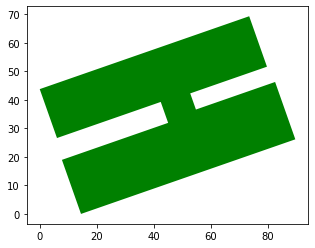

In [14]:
# MinMaxScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

import geopandas as gpd
import numpy as np
from shapely.geometry import mapping, Polygon
from sklearn.preprocessing import MinMaxScaler

# get all coordinates of ic_predio.geometry polygon
g = [i for i in ic_predio.geometry]
all_coords = mapping(g[0])["coordinates"] # for first feature/row
a = list(all_coords)


# get total bounds of ic_predio.geometry polygon
minx, miny, maxx, maxy = ic_predio.total_bounds
# print(minx, miny, maxx, maxy)


# create lists to x and y coordinates
polygon_x = [list(a[0][i])[0] for i in range(len(a[0]))]
polygon_y = [list(a[0][i])[1] for i in range(len(a[0]))]
# print(polygon_x)
# print(polygon_y)
# print(len(polygon_y))


# convert to 2D array
data_x = np.array(polygon_x).reshape(-1, 1) # reshape -> 2D array
data_y = np.array(polygon_y).reshape(-1, 1)
# print(scaler_x.fit(data_x))
# print(scaler_x.data_max_)
# print(scaler_x.transform(data_x))


# rescale x and y
scaler_x = MinMaxScaler(feature_range=(0, maxx - minx))
scaler_y = MinMaxScaler(feature_range=(0, maxy - miny))

scaler_x.fit(data_x)
transform_x = scaler_x.transform(data_x)

scaler_y.fit(data_y)
transform_y = scaler_y.transform(data_y)


# convert np array x and y to polygon
newArray = np.append (transform_x, transform_y, axis=1)
new_polygon = Polygon(newArray)
print('Rescale polygon:\n\n', new_polygon)

boundary = gpd.GeoSeries(new_polygon)
boundary.plot(color='Green')

In [15]:
# diferença entre total_bounds e bounds
print(boundary.total_bounds)
boundary.bounds

[ 0.          0.         89.66854577 69.34931372]


,minx,miny,maxx,maxy
0,0.0,0.0,89.668546,69.349314


# Quebrando Formas Geométricas (Prédios)

- Quebrar formas geometricas em retangulos para desenhar no ns3


Referências:
- https://shapely.readthedocs.io/en/stable/manual.html
- https://geopandas.org/docs/reference/geoseries.html

In [16]:
# Geoseries: https://geopandas.org/docs/reference/geoseries.html
from shapely.geometry import Point, Polygon, LineString

def study_functions(building_geometry):
   
    # General methods and attributes

    print('\nArea:', building_geometry.area)
    print('\nLength:', building_geometry.length) # perimeter
    print('\nBounds:', building_geometry.bounds)
    print('\nTotal_bounds:', building_geometry.total_bounds)
    print('\nGeometry_type:', building_geometry.geom_type)
    print('\nExterior:', building_geometry.exterior)
    print('\nInterior:', building_geometry.interiors)

    # Unary predicates
    # print('\nis empty::', ic_predio['geometry'].is_empty) # also works
    print('\nIs empty:', building_geometry.is_empty)
    print('\nIs valid:', building_geometry.is_valid)
    print('\nHas z:', building_geometry.has_z) #  geometries that do not cross themselves

    # Geometric Manipulations
    # print('Boundary:', ic_predio.boundary.plot())
    print('\nEnvelop:', building_geometry['geometry'].envelope )
    print('\nConvex hull:', building_geometry['geometry'].convex_hull )
    print('\nSimplify:', building_geometry['geometry'].simplify )


# study_functions(ic_predio)


Type: Polygon 

POLYGON ((1523124.240892188 7442348.144283261, 1523197.723582144 7442373.71175791, 1523203.960573605 7442356.013585348, 1523177.036987259 7442346.648395462, 1523179.038096221 7442340.982828954, 1523206.81569678 7442350.649647839, 1523213.909437959 7442330.533049183, 1523138.718825039 7442304.362444185, 1523132.026113332 7442323.327823416, 1523169.291146972 7442336.306375942, 1523166.695746835 7442343.653216023, 1523130.295850078 7442330.986773305, 1523124.240892188 7442348.144283261))


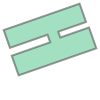

In [17]:
p = ic_predio.geometry.values[0]
print('\nType:', p.geom_type, '\n')


print(ic_predio.geometry.values[0])
ic_predio.geometry.values[0]

In [18]:
# check scikit-learn version
import sklearn
print('sklearn: %s' % sklearn.__version__)

sklearn: 0.24.2


[<shapely.geometry.polygon.Polygon object at 0x7fad38656a60>, <shapely.geometry.polygon.Polygon object at 0x7fad386569d0>, <shapely.geometry.polygon.Polygon object at 0x7fad386569a0>, <shapely.geometry.polygon.Polygon object at 0x7fad38656910>]

Length: 4

 POLYGON ((1523130.295850088 7442330.986773308, 1523130.295850078 7442330.986773305, 1523124.240892188 7442348.144283261, 1523197.723582144 7442373.71175791, 1523203.960573605 7442356.013585348, 1523203.960530759 7442356.013570444, 1523166.790358576 7442343.385397075, 1523166.695746835 7442343.653216023, 1523130.295850088 7442330.986773308))

 POLYGON ((1523166.790358576 7442343.385397075, 1523130.295850088 7442330.986773308, 1523166.695746835 7442343.653216023, 1523166.790358576 7442343.385397075))

 POLYGON ((1523166.790358576 7442343.385397075, 1523203.960530759 7442356.013570444, 1523177.036987259 7442346.648395462, 1523179.038096221 7442340.982828954, 1523206.81569678 7442350.649647839, 1523169.09247654 7442336.868755467, 152316

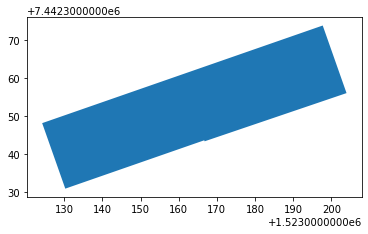

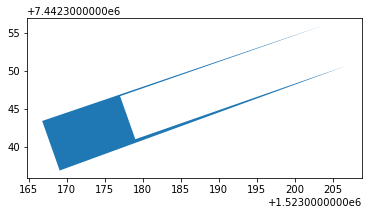

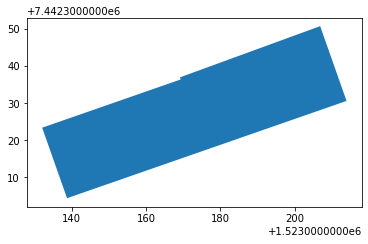

In [23]:
from matplotlib import pyplot as plt
import geopandas as gpd
from shapely.ops import linemerge, unary_union, polygonize
from shapely.geometry import LineString, Polygon

# Define the Polygon and the cutting line

polygon = p

line_up = LineString([( 1523130.295850078, 7442330.986773305), (1523203.960573605, 7442356.013585)])
line_bottom = LineString([( 1523132.026113331, 7442323.327823416), (1523206.81569678, 7442350.649647839)])



def cut_polygon_by_line(polygon, line1, line2):
    merged = linemerge([polygon.boundary, line1,line2])
    borders = unary_union(merged)
    polygons = polygonize(borders)
    return list(polygons)

def plot_new_polygons(shapely_objects, figure_path='fig.png'):
    boundary = gpd.GeoSeries(shapely_objects)
    boundary.plot()
#     boundary.plot(color=['red', 'green', 'blue', 'orange', 'yellow'])

#     plt.savefig(figure_path)

result = cut_polygon_by_line(polygon, line_up, line_bottom)
print(result)
print('\nLength:', len(result))
print('\n', result[0])
print('\n', result[1])
print('\n', result[2])
print('\n', result[3])


# print()
# print(result[0].intersection(result[1]))
# print(result[0].intersection(result[2]))
# print(result[1].intersection(result[2]))

plot_new_polygons(result[0])
plot_new_polygons(result[2])
plot_new_polygons(result[3])

In [20]:
# a = ic_predio.scale(5000, 6000)
# a.boundary.plot()

# Utilizando só as bordas

- Ao invés de quebrar o polígono em várias partes, utilizar os bounds para desenhar no NS3



           minx          miny          maxx          maxy
3  1.523123e+06  7.442303e+06  1.523215e+06  7.442375e+06

 [1523123.24185591 7442303.36329384 1523214.90848201 7442374.71091508]


<AxesSubplot:>

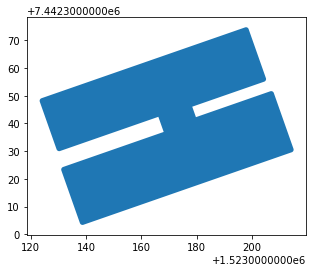

In [21]:
# gpd.options.display_precision = 9

round_ic_predio = ic_predio['geometry'].buffer(1) ## 2, 10, 200, 2000, etc
print(round_ic_predio.bounds)
print('\n',round_ic_predio.total_bounds)
round_ic_predio.plot()


# zoom 
# ax = round_ic_predio.plot()

# minx, miny, maxx, maxy = round_ic_predio.total_bounds
# ax.set_xlim(minx, maxx)
# ax.set_ylim(miny, maxy)

In [22]:
unicamp_utm_df['area'] = unicamp_utm_df.geometry.area # m2
unicamp_utm_df

,osm_id,name,type,geometry,area
0,95011154,IC 3,university,"POLYGON ((1523281.351 7442464.552, 1523283.568...",970.235998
1,95011157,Banco Santander,bank,"POLYGON ((1522735.408 7442140.770, 1522734.012...",545.292049
2,95011161,Ciclo Básico II,university,"POLYGON ((1522531.040 7442033.143, 1522551.658...",2061.132643
3,95011169,IC - Instituto de Computação,university,"POLYGON ((1523124.241 7442348.144, 1523197.724...",3152.769765
4,95011172,IC 3.5,university,"POLYGON ((1523236.044 7442480.600, 1523240.184...",580.923005
...,...,...,...,...,...
504,698317159,Nudecri / Labeurb,university,"POLYGON ((1523464.819 7441217.697, 1523470.080...",620.639377
505,698317160,None,university,"POLYGON ((1523489.563 7441248.508, 1523494.749...",212.877402
506,747442133,O Funcional,None,"POLYGON ((1521670.306 7441410.848, 1521684.726...",133.952960
507,747442134,Jardim Aéreo,None,"POLYGON ((1521674.883 7441414.123, 1521682.153...",286.041366
